<a href="https://colab.research.google.com/github/eli-vigneron/pytorch_collection/blob/main/visualizing_features_of_VGG19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Goal**

The goal of this is to visualize the features in the VGG19 model using the activation maximization algorithm presented in class.



In [ ]:
import torch
import torchvision
import matplotlib.pyplot as plt
from IPython.display import clear_output
%matplotlib inline

In [ ]:
size = 224
layer_index = 21

lr = 0.05
weight_decay = 1e-6
optimization_steps = 30

device = 'cuda'

In [ ]:
model = torchvision.models.vgg19(pretrained=True).eval().to(device)

def hook(module, input, output):
    module.output = output

layer = model.features[layer_index]
layer.register_forward_hook(hook)

mean = torch.FloatTensor([0.485, 0.456, 0.406]).view(1,3,1,1).to(device)
std = torch.FloatTensor([0.229, 0.224, 0.225]).view(1,3,1,1).to(device)

In [ ]:
!pip install fastai==0.7.0 --no-deps

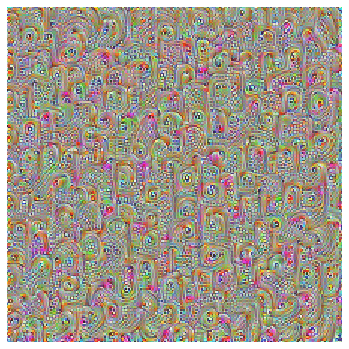

In [ ]:
filter_index = torch.randint(layer.weight.shape[0], [1])

image = torch.rand((1, 3, size, size), device=device)

# TASK 1: ADD CODE HERE
from torch.autograd import Variable

imagev = Variable(image, requires_grad=True)

# TASK 2: ADD CODE HERE

optimizer = torch.optim.Adam([imagev], lr=lr, weight_decay=weight_decay)

for _ in range(optimization_steps):
    model(imagev)
    feature = layer.output

    optimizer.zero_grad()
    #print(feature)

    # TASK 3: ADD CODE HERE
    loss = -feature[0, filter_index].mean()

    loss.backward()

    optimizer.step()
    
    tmp = torch.clamp(imagev*std + mean, min=0, max=1)
    tmp = tmp.squeeze(0).permute(1,2,0).detach().cpu().numpy()
    
    plt.figure(figsize=(12,6))
    plt.matshow(tmp, fignum=1)
    plt.axis('off')
    plt.show()
    clear_output(wait=True)